In [9]:

#You need to compile braina.mod and bodya.mod first using nrnivmodl
#This script is part of doing the following tasks:
# 1. Numerically vary gfb (the feedback conductance). Currently in brain.mod, gfb is  set to 0.001. Try varying it and see if you can get an increase in Q. Can you  nd an
#optimum?
#2. Numerically vary gsyn (the synaptic conductance). Currently in brain.mod, gsyn is set to 0.005. Try varying it and see if you can get an increase in Q. Can you  nd an optimum?
#3. See if you can improve Q by varying both gfb and gsyn. Can you  nd an optimum for varying them both together?



from neuron import h
import numpy as np
import matplotlib.pyplot as plt

h.load_file('stdrun.hoc')
T=3055
simdur =4*T

def performance(gfb, gsyn):
    sec = h.Section(name='mod')
    sec.insert('braina')
    sec.insert('bodya')
    seg = sec(0.5)

    seg.braina.gfb  = gfb
    seg.braina.gsyn = gsyn
    seg.braina._ref_L1Pointer = seg.bodya._ref_L1
    seg.braina._ref_L2Pointer = seg.bodya._ref_L2
    seg.bodya._ref_V1Pointer = seg.braina._ref_V1
    seg.bodya._ref_V2Pointer = seg.braina._ref_V2


    Qv = h.Vector().record(seg.bodya._ref_Q)
    tv = h.Vector().record(h._ref_t)

    h.finitialize()
    h.cvode.active(1)
    h.continuerun(simdur)

    Q = np.array(Qv)
    return Q[-1] / simdur
original_gfb = 0.001
original_gsyn = 0.005
original_Q = performance(original_gfb, original_gsyn)
print(f"\nOriginal performance with gfb={original_gfb} and gsyn={original_gsyn}: Performance= {original_Q:.6e}\n")


Original performance with gfb=0.001 and gsyn=0.005: Performance= 1.231114e-03



gfb=0.000050, Performance=0.001495
gfb=0.000253, Performance=0.001460
gfb=0.000456, Performance=0.001403
gfb=0.000659, Performance=0.001344
gfb=0.000862, Performance=0.001269
gfb=0.001065, Performance=0.001236
gfb=0.001268, Performance=0.001252
gfb=0.001471, Performance=0.001266
gfb=0.001674, Performance=0.001281
gfb=0.001878, Performance=0.001292
gfb=0.002081, Performance=0.001303
gfb=0.002284, Performance=0.001301
gfb=0.002487, Performance=0.001269
gfb=0.002690, Performance=0.001225
gfb=0.002893, Performance=0.001173
gfb=0.003096, Performance=0.001108
gfb=0.003299, Performance=0.001052
gfb=0.003502, Performance=0.001020
gfb=0.003705, Performance=0.000969
gfb=0.003908, Performance=0.000891
gfb=0.004111, Performance=0.000788
gfb=0.004314, Performance=0.000707
gfb=0.004517, Performance=0.000656
gfb=0.004720, Performance=0.000612
gfb=0.004923, Performance=0.000575
gfb=0.005127, Performance=0.000540
gfb=0.005330, Performance=0.000509
gfb=0.005533, Performance=0.000479
gfb=0.005736, Perfor

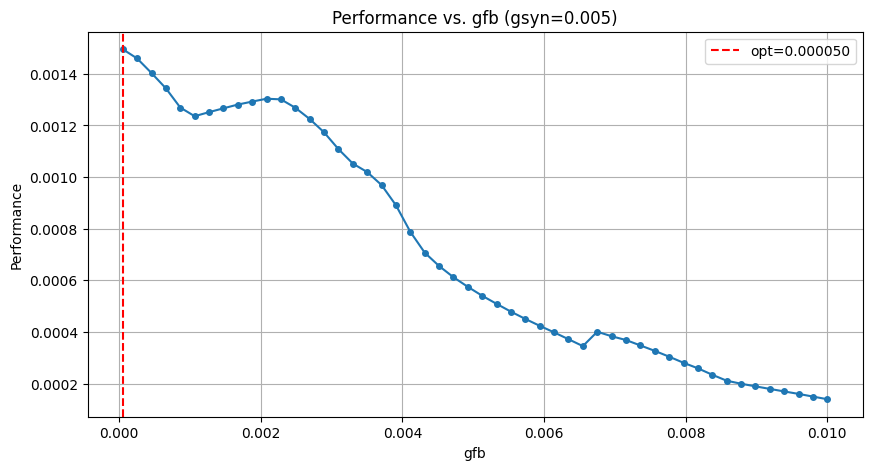

In [6]:
# gfb with extended range
gfb_vals = np.linspace(0.00005, 0.01, 50)  
Q_gfb = []
for g in gfb_vals:
    Q = performance(g, 0.005)
    Q_gfb.append(Q)
    print(f"gfb={g:.6f}, Performance={Q:.6f}")

opt_i = np.argmax(Q_gfb)
print(f"\n→ Optimum gfb = {gfb_vals[opt_i]:.6f}, Performance = {Q_gfb[opt_i]:.6e}")

plt.figure(figsize=(10, 5))
plt.plot(gfb_vals, Q_gfb, '-o', markersize=4)
plt.axvline(gfb_vals[opt_i], color='red', linestyle='--', 
            label=f"opt={gfb_vals[opt_i]:.6f}")
plt.xlabel('gfb')
plt.ylabel('Performance')
plt.title('Performance vs. gfb (gsyn=0.005)')
plt.grid(True)
plt.legend()
plt.show()

gsyn=0.001000, Performance=0.001153
gsyn=0.001592, Performance=0.001179
gsyn=0.002184, Performance=0.001390
gsyn=0.002776, Performance=0.001392
gsyn=0.003367, Performance=0.001441
gsyn=0.003959, Performance=0.001449
gsyn=0.004551, Performance=0.001346
gsyn=0.005143, Performance=0.001244
gsyn=0.005735, Performance=0.001293
gsyn=0.006327, Performance=0.001334
gsyn=0.006918, Performance=0.001289
gsyn=0.007510, Performance=0.001159
gsyn=0.008102, Performance=0.001013
gsyn=0.008694, Performance=0.000917
gsyn=0.009286, Performance=0.000915
gsyn=0.009878, Performance=0.000912
gsyn=0.010469, Performance=0.000909
gsyn=0.011061, Performance=0.000906
gsyn=0.011653, Performance=0.000903
gsyn=0.012245, Performance=0.000900
gsyn=0.012837, Performance=0.000930
gsyn=0.013429, Performance=0.000931
gsyn=0.014020, Performance=0.000935
gsyn=0.014612, Performance=0.000939
gsyn=0.015204, Performance=0.000942
gsyn=0.015796, Performance=0.000945
gsyn=0.016388, Performance=0.000946
gsyn=0.016980, Performance=0

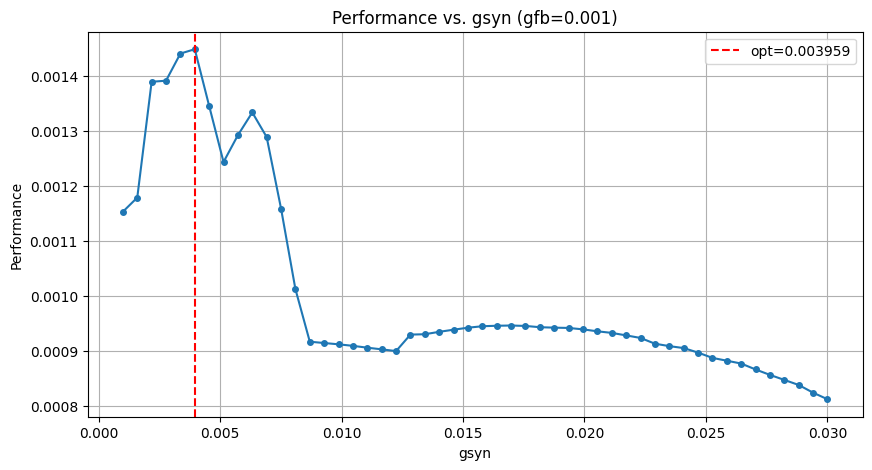

In [7]:
#  gsyn with extended range
gsyn_vals = np.linspace(0.001, 0.03, 50)  
Q_gsyn = []
for g in gsyn_vals:
    Q = performance(0.001, g)
    Q_gsyn.append(Q)
    print(f"gsyn={g:.6f}, Performance={Q:.6f}")

opt_j = np.argmax(Q_gsyn)
print(f"\n Optimum gsyn = {gsyn_vals[opt_j]:.6f}, Performance = {Q_gsyn[opt_j]:.6e}")

plt.figure(figsize=(10, 5))
plt.plot(gsyn_vals, Q_gsyn, '-o', markersize=4)
plt.axvline(gsyn_vals[opt_j], color='red', linestyle='--',
            label=f"opt={gsyn_vals[opt_j]:.6f}")
plt.xlabel('gsyn')
plt.ylabel('Performance')
plt.title('Performance vs. gsyn (gfb=0.001)')
plt.grid(True)
plt.legend()
plt.show()

gfb=0.000500, gsyn=0.001000, Performance=0.000430
gfb=0.000500, gsyn=0.001569, Performance=0.001154
gfb=0.000500, gsyn=0.002137, Performance=0.001363
gfb=0.000500, gsyn=0.002706, Performance=0.001354
gfb=0.000500, gsyn=0.003274, Performance=0.001392
gfb=0.000500, gsyn=0.003843, Performance=0.001448
gfb=0.000500, gsyn=0.004411, Performance=0.001484
gfb=0.000500, gsyn=0.004980, Performance=0.001404
gfb=0.000500, gsyn=0.005548, Performance=0.001237
gfb=0.000500, gsyn=0.006117, Performance=0.001284
gfb=0.000500, gsyn=0.006685, Performance=0.001323
gfb=0.000500, gsyn=0.007254, Performance=0.001320
gfb=0.000500, gsyn=0.007822, Performance=0.001228
gfb=0.000500, gsyn=0.008391, Performance=0.001113
gfb=0.000500, gsyn=0.008959, Performance=0.000986
gfb=0.000611, gsyn=0.001000, Performance=0.000430
gfb=0.000611, gsyn=0.001569, Performance=0.001157
gfb=0.000611, gsyn=0.002137, Performance=0.001386
gfb=0.000611, gsyn=0.002706, Performance=0.001361
gfb=0.000611, gsyn=0.003274, Performance=0.001401


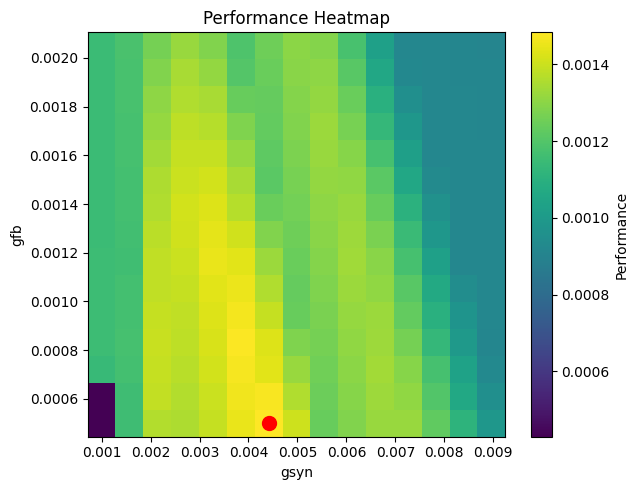

In [8]:
gfb_range = np.linspace(max(0.0005, gfb_vals[opt_i]-0.002), 
                       min(0.01, gfb_vals[opt_i]+0.002), 15)
gsyn_range = np.linspace(max(0.001, gsyn_vals[opt_j]-0.005),
                        min(0.03, gsyn_vals[opt_j]+0.005), 15)


P = np.zeros((len(gfb_range), len(gsyn_range)))
for i, gfb in enumerate(gfb_range):
    for j, gsyn in enumerate(gsyn_range):
        P[i,j] = performance(gfb, gsyn)
        print(f"gfb={gfb:.6f}, gsyn={gsyn:.6f}, Performance={P[i,j]:.6f}")

# joint optimum
i_opt, j_opt = np.unravel_index(P.argmax(), P.shape)
gfb_opt, gsyn_opt = gfb_range[i_opt], gsyn_range[j_opt]
print(f"\nJoint optimum (gfb, gsyn) = ({gfb_opt:.6f}, {gsyn_opt:.6f}), Performance= {P.max():.6e}")


plt.figure(figsize=(12, 5))

# Heatmap
plt.subplot(1, 2, 1)
pcm = plt.pcolormesh(gsyn_range, gfb_range, P,
                    shading='auto', cmap='viridis')
plt.colorbar(pcm, label='Performance')
plt.scatter(gsyn_opt, gfb_opt, c='red', s=100, 
            label=f'Optimum\n({gsyn_opt:.4f}, {gfb_opt:.4f})')
plt.xlabel('gsyn')
plt.ylabel('gfb')
plt.title('Performance Heatmap')


plt.tight_layout()
plt.show()
